
# Basic Natural Language Processing and Modifying .csv files

### Importing Libraries

In [1]:
import pandas as pd
import nltk
import string
import seaborn as sns
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
from textblob import TextBlob
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn import tree
from sklearn import svm

### Importing Data resources

In [2]:
raw_test_loc = "./resource_data/train.csv"
test_loc = "./modified_resources_data/test_df.csv"

### Converting to Python Objects

In [3]:
def to_df(filepath):
    df = pd.read_csv(filepath).dropna()
    cols = df.columns
    col_dict= {}
    for i in cols:
        col_dict[i] = df[i].unique()
    for i in col_dict.keys():
        print("Unique", i ,":", end= " ")
        if (len(col_dict[i]) < 10):
            print( col_dict[i])
        else:
            print(len(col_dict[i]))
    return df

### Preprocessing with NLTK

In [4]:
def pre_process(text):
#   Lower Texts
    text = text.lower()
#   Remove Punctuation
    text_p = "".join([char for char in text if char not in string.punctuation])
#   Tokenize
    words = word_tokenize(text_p)
#   Stopword Filtering
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
#   Stemming 
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
#   Part of Speech Token
    pos = pos_tag(filtered_words)
    return [words, filtered_words, stemmed, pos]
def toNGrams(token, n):
    return list(ngrams(token, n))
def get_sentiment_objectivity(text):
    return TextBlob(text)

### Modifying the Data Frames (THIS TAKES FOREVER TRY TO AVOID)

In [5]:
# test_df = to_df(raw_test_loc)
# test_df['words'] = None
# test_df['filtered_words'] = None
# test_df['stemmed_words'] = None
# test_df['word_count'] = None
# test_df['pos'] = None
# test_df['polarity'] = None
# test_df['subjectivity'] = None
# for i in test_df.index:
#     text_processed = pre_process(test_df['discourse_text'][i])
#     s_o = get_sentiment_objectivity(test_df['discourse_text'][i]).sentiment
#     test_df['words'][i] = text_processed[0]
#     test_df['filtered_words'][i] = text_processed[1]
#     test_df['stemmed_words'][i] = text_processed[2]
#     test_df['word_count'][i] = len(text_processed[0])
#     test_df['polarity'][i] = s_o[0]
#     test_df['subjectivity'][i] = s_o[1]  
#     test_df['pos'][i] = text_processed[3]
# test_df.to_csv(test_loc)

# Data Analysis

### Importing the new Data frame from CSV

In [6]:
test_df = to_df(test_loc)
test_df.words = test_df.words.apply(literal_eval)
test_df.filtered_words = test_df.filtered_words.apply(literal_eval)
test_df.stemmed_words = test_df.stemmed_words.apply(literal_eval)
test_df.pos = test_df.pos.apply(literal_eval)
test_df

Unique Unnamed: 0 : 36765
Unique discourse_id : 36765
Unique essay_id : 4191
Unique discourse_text : 36691
Unique discourse_type : ['Lead' 'Position' 'Claim' 'Evidence' 'Counterclaim' 'Rebuttal'
 'Concluding Statement']
Unique discourse_effectiveness : ['Adequate' 'Ineffective' 'Effective']
Unique words : 36561
Unique filtered_words : 36355
Unique stemmed_words : 36295
Unique word_count : 374
Unique pos : 36355
Unique polarity : 6727
Unique subjectivity : 6968


,Unnamed: 0,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,words,filtered_words,stemmed_words,word_count,pos,polarity,subjectivity
0,0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"[hi, im, isaac, im, going, to, be, writing, ab...","[hi, im, isaac, im, going, writing, face, mars...","[hi, im, isaac, im, go, write, face, mar, natu...",67,"[(hi, NN), (im, NN), (isaac, NN), (im, NN), (g...",0.100000,0.400000
1,1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,"[on, my, perspective, i, think, that, the, fac...","[perspective, think, face, natural, landform, ...","[perspect, think, face, natur, landform, dont,...",41,"[(perspective, NN), (think, NN), (face, NN), (...",0.000000,0.225000
2,2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,"[i, think, that, the, face, is, a, natural, la...","[think, face, natural, landform, life, mars, d...","[think, face, natur, landform, life, mar, desc...",21,"[(think, VB), (face, NN), (natural, JJ), (land...",0.100000,0.400000
3,3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"[if, life, was, on, mars, we, would, know, by,...","[life, mars, would, know, reason, think, natur...","[life, mar, would, know, reason, think, natur,...",72,"[(life, NN), (mars, NNS), (would, MD), (know, ...",0.000505,0.561111
4,4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,"[people, thought, that, the, face, was, formed...","[people, thought, face, formed, alieans, thoug...","[peopl, thought, face, form, aliean, thought, ...",18,"[(people, NNS), (thought, VBD), (face, NN), (f...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36760,36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking on...,Claim,Adequate,"[for, many, people, they, dont, like, only, as...","[many, people, dont, like, asking, one, person...","[mani, peopl, dont, like, ask, one, person, ad...",21,"[(many, JJ), (people, NNS), (dont, VBP), (like...",0.333333,0.666667
36761,36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions ...,Claim,Adequate,"[also, people, have, different, views, and, op...","[also, people, different, views, opinions, thi...","[also, peopl, differ, view, opinion, thing]",9,"[(also, RB), (people, NNS), (different, JJ), (...",0.000000,0.600000
36762,36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons ...,Position,Adequate,"[advice, is, something, that, can, impact, a, ...","[advice, something, impact, persons, view, man...","[advic, someth, impact, person, view, mani, wa...",23,"[(advice, NN), (something, NN), (impact, JJ), ...",0.500000,0.500000
36763,36763,cc184624ca8e,FFA381E58FC6,someone can use everything that many people sa...,Evidence,Ineffective,"[someone, can, use, everything, that, many, pe...","[someone, use, everything, many, people, said,...","[someon, use, everyth, mani, peopl, said, use,...",82,"[(someone, NN), (use, NN), (everything, NN), (...",0.410714,0.496429


### Functions

In [7]:
def word_count(df):
    words_dict = {}
    discourse_type= []
    discourse_effectiveness = []
    for i in df.index:
        for word in df['filtered_words'][i]:
            if word in words_dict.keys():
                words_dict[word] = words_dict[word]+1
            else:
                words_dict[word] = 1
        discourse_type.append(df['discourse_type'][i])
        discourse_effectiveness.append(df['discourse_effectiveness'][i])
    word_df = pd.DataFrame(list(zip(words_dict.keys(), words_dict.values(), discourse_type, discourse_effectiveness)),columns=['word', 'count','discourse_type','discourse_effectiveness'])
    word_df=word_df.sort_values(by=['count'], ascending=False)
    return word_df
word_df = word_count(test_df)
word_df

,word,count,discourse_type,discourse_effectiveness
391,students,12520,Claim,Adequate
29,would,10623,Evidence,Adequate
46,people,10415,Claim,Effective
300,school,7185,Claim,Effective
19455,electoral,7076,Concluding Statement,Adequate
...,...,...,...,...
16472,gron,1,Claim,Adequate
16471,horuses,1,Evidence,Adequate
16470,roff,1,Claim,Adequate
16469,contestes,1,Rebuttal,Adequate


### Making Data frames for each effectiveness [Effective, Ineffective, Adequate]

In [8]:
effective_df=test_df.loc[test_df['discourse_effectiveness'] == "Effective"]
ineffective_df = test_df.loc[test_df['discourse_effectiveness'] == "Ineffective"]
adequate_df = test_df.loc[test_df['discourse_effectiveness'] == "Adequate"]

evidence_df = test_df.loc[test_df['discourse_type'] == 'Evidence']
rebuttal_df = test_df.loc[test_df['discourse_type'] == 'Rebuttal']
claim_df = test_df.loc[test_df['discourse_type'] == 'Claim']
counterclaim_df = test_df.loc[test_df['discourse_type'] == 'Counterclaim']
position_df = test_df.loc[test_df['discourse_type'] == 'Position']
lead_df = test_df.loc[test_df['discourse_type'] == 'Lead']
concluding_df = test_df.loc[test_df['discourse_type'] == 'Concluding Statement']

### Word count vs Effectiveness.
This can be used to see if there is a correlation between the number of words written vs its effectiveness

discourse_effectiveness
Adequate       35.052963
Effective      63.239653
Ineffective    48.578149
Name: word_count, dtype: float64

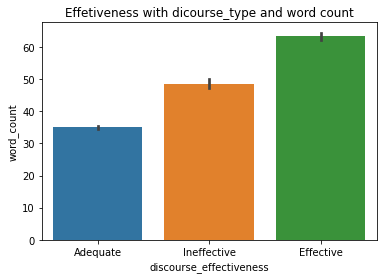

In [9]:
sns.barplot(data=test_df, y='word_count', 
            x= 'discourse_effectiveness',
            errorbar=('ci',95),
           ).set(title="Effetiveness with dicourse_type and word count")
test_df.groupby('discourse_effectiveness').word_count.mean()

### Polarity vs Effectiveness

discourse_effectiveness
Adequate       0.138484
Effective      0.154103
Ineffective    0.135989
Name: polarity, dtype: float64

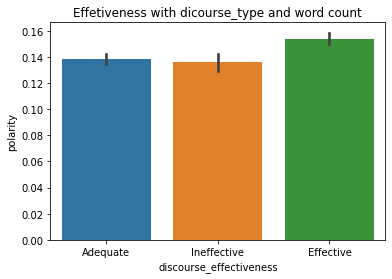

In [10]:
sns.barplot(data=test_df, y='polarity', 
            x= 'discourse_effectiveness',
            errorbar=('ci',95),
           ).set(title="Effetiveness with dicourse_type and word count")
test_df.groupby('discourse_effectiveness').polarity.mean()

### Subjectivity vs Effectiveness

discourse_effectiveness
Adequate       0.423985
Effective      0.457080
Ineffective    0.425296
Name: subjectivity, dtype: float64

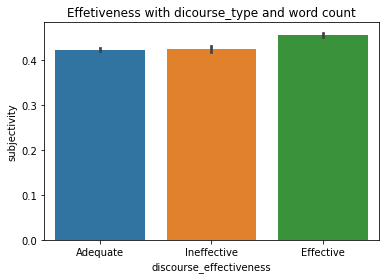

In [11]:
sns.barplot(data=test_df, y='subjectivity', 
            x= 'discourse_effectiveness',
            errorbar=('ci',95),
           ).set(title="Effetiveness with dicourse_type and word count")
test_df.groupby('discourse_effectiveness').subjectivity.mean()

### Discourse Type vs Word Count

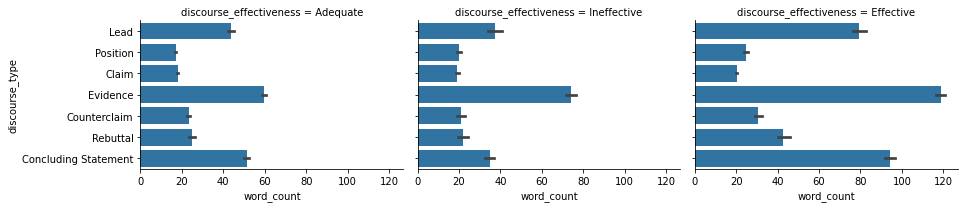

In [12]:
g = sns.FacetGrid(test_df, col="discourse_effectiveness",aspect = 1.5,height = 3)
g.map(sns.barplot, 'word_count', 'discourse_type', order=['Lead','Position','Claim','Evidence' ,'Counterclaim', 'Rebuttal',
 'Concluding Statement'])


### Discourse type vs Polarity

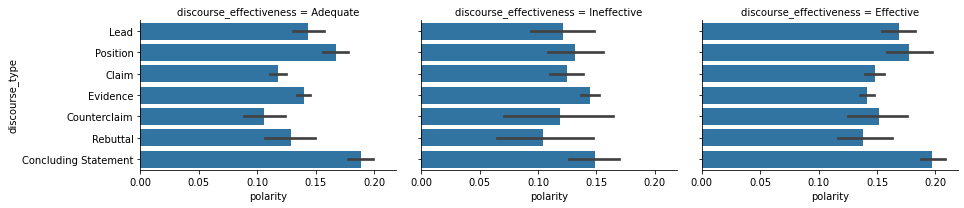

In [13]:
g = sns.FacetGrid(test_df, col="discourse_effectiveness",aspect = 1.5,height = 3)
g.map(sns.barplot, 'polarity', 'discourse_type', order=['Lead','Position','Claim','Evidence' ,'Counterclaim', 'Rebuttal',
 'Concluding Statement'])


### Discourse Type vs Subjectivity

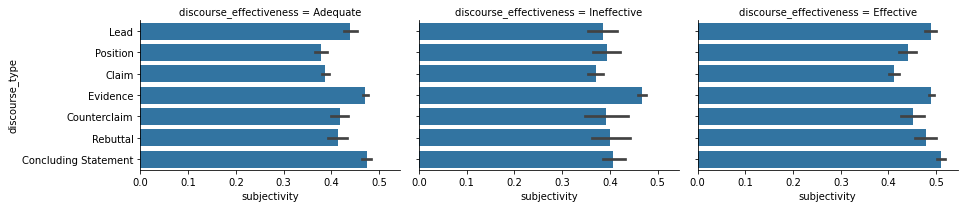

In [14]:
g = sns.FacetGrid(test_df, col="discourse_effectiveness",aspect = 1.5,height = 3)
g.map(sns.barplot, 'subjectivity', 'discourse_type', order=['Lead','Position','Claim','Evidence' ,'Counterclaim', 'Rebuttal',
 'Concluding Statement'])


## Word Statistics

### Top 10 Words Used Overall

<AxesSubplot: xlabel='count', ylabel='word'>

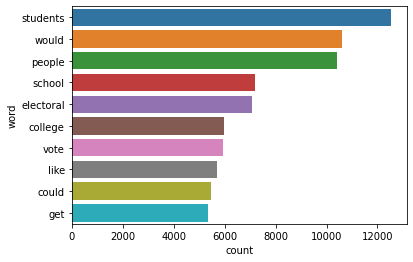

In [15]:
sns.barplot(data=word_df,
           y = word_df.head(10)['word'],
           x= word_df.head(10)['count'])

### Top 10 words across each effectiveness level

In [16]:
# effective = set(list(word_df.loc[word_df['discourse_effectiveness'] == 'Effective'].sort_values(by='count', ascending=False).head(10)['word']))
# adequate = set(list(word_df.loc[word_df['discourse_effectiveness'] == 'Adequate'].sort_values(by='count', ascending=False).head(10)['word']))
# ineffective=set(list(word_df.loc[word_df['discourse_effectiveness'] == 'Ineffective'].sort_values(by='count', ascending=False).head(10)['word']))
# # venn2([set(effective), set(adequate), set(ineffective)], set_labels = ('Effective', 'Adequate', 'Ineffective'))
# venn2([set(effective), set(adequate)])

### Top 10 words in Effective Arguments

[Text(0.5, 1.0, 'Top 10 Words in Effective')]

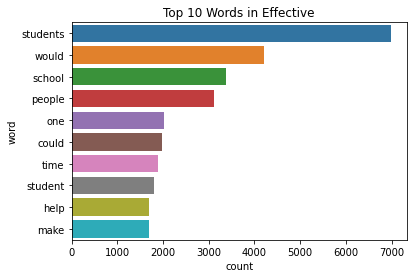

In [17]:
sns.barplot(data=word_count(effective_df).head(10),
           y = 'word',
           x = 'count').set(title='Top 10 Words in Effective')

### top 10 words in Adequate Arguments

[Text(0.5, 1.0, 'Top 10 Words in Adequate')]

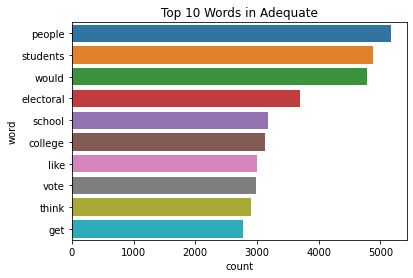

In [18]:
sns.barplot(data=word_count(adequate_df).head(10),
           y = 'word',
           x = 'count').set(title='Top 10 Words in Adequate')

### Top 10 Words in Ineffective Arguments

[Text(0.5, 1.0, 'Top 10 Words in Ineffective')]

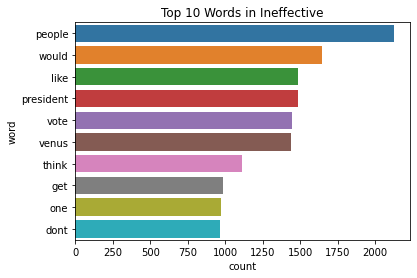

In [19]:
sns.barplot(data=word_count(ineffective_df).head(10),
           y = 'word',
           x = 'count').set(title='Top 10 Words in Ineffective')

# Attempting to create an AI model

### Vectorize the input text

In [20]:
vector = CountVectorizer()
vector.fit_transform(test_df.head(28800)['discourse_text'])
vector.vocabulary_.get(u'algorithm')
X_train_counts = vector.fit_transform(test_df.head(28800)['discourse_text'])
X_train_counts.shape

(28800, 24778)

### Perform term frequency Inverse Term Frequency

In [21]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(28800, 24778)

### A pipeline for training different models that use different classification tools
vect = Bag of Words for the input of modelling tool
<br>tfidf = term frequency inverse time frequency
<br>clf = Claffication tool

In [22]:
# text_clf = Pipeline([
#      ('vect', CountVectorizer()),
#      ('tfidf', TfidfTransformer()),
#      ('clf', MultinomialNB()),
#  ])

In [23]:
# text_clf = Pipeline([
#      ('vect', CountVectorizer()),
#      ('tfidf', TfidfTransformer()),
#      ('clf', SGDClassifier(loss='hinge', penalty='l2',
#                            alpha=1e-3, random_state=42,
#                            max_iter=5, tol=None)),
# ])


In [24]:
# text_clf = Pipeline([
#      ('vect', CountVectorizer()),
#      ('tfidf', TfidfTransformer()),
#      ('clf', tree.DecisionTreeClassifier()),
# ])

In [25]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', svm.SVC()),
])

### Train the Data
Divide the data into 80/20 split
<br> 80% train data
<br> 20% test data

In [ ]:
text_clf.fit(test_df.head(28800)['discourse_text'], test_df.head(28800)['discourse_effectiveness'])

In [ ]:
Pipeline(...)

### Predict with the model

In [ ]:
predicted = text_clf.predict(test_df.tail(7200)['discourse_text'])

### Performance Testing

In [ ]:
np.mean(predicted ==test_df.tail(7200)['discourse_effectiveness'])

### Advance metrics

In [ ]:
print(metrics.classification_report(test_df.tail(7200)['discourse_effectiveness'], predicted,
    target_names=test_df['discourse_effectiveness'].unique()))